In [1]:
import pandas as pd
import numpy as np

## NYSE stats

In [2]:
nyse = pd.read_csv('nyse_processed.csv')
nyse.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Daily_return,Trend,Trend_duration
0,0,2019-12-02,13554.290039,13554.290039,13443.099609,13448.259766,13448.259766,3285750000,NaN,DOWN,1
1,1,2019-12-03,13363.660156,13373.879883,13280.040039,13366.089844,13366.089844,3671580000,-0.006110,DOWN,2
2,2,2019-12-04,13408.080078,13484.410156,13408.080078,13457.969727,13457.969727,3702980000,0.006874,UP,1
3,3,2019-12-05,13466.730469,13491.209961,13429.299805,13482.299805,13482.299805,3360480000,0.001808,UP,2
4,4,2019-12-06,13515.480469,13612.059570,13515.480469,13588.290039,13588.290039,3483310000,0.007861,UP,3


In [3]:
nyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      777 non-null    int64  
 1   Date            777 non-null    object 
 2   Open            777 non-null    float64
 3   High            777 non-null    float64
 4   Low             777 non-null    float64
 5   Close           777 non-null    float64
 6   Adj Close       777 non-null    float64
 7   Volume          777 non-null    int64  
 8   Daily_return    776 non-null    float64
 9   Trend           777 non-null    object 
 10  Trend_duration  777 non-null    int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 66.9+ KB


In [4]:
nyse = nyse.drop('Unnamed: 0', axis=1)
nyse

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_return,Trend,Trend_duration
0,2019-12-02,13554.290039,13554.290039,13443.099609,13448.259766,13448.259766,3285750000,NaN,DOWN,1
1,2019-12-03,13363.660156,13373.879883,13280.040039,13366.089844,13366.089844,3671580000,-0.006110,DOWN,2
2,2019-12-04,13408.080078,13484.410156,13408.080078,13457.969727,13457.969727,3702980000,0.006874,UP,1
3,2019-12-05,13466.730469,13491.209961,13429.299805,13482.299805,13482.299805,3360480000,0.001808,UP,2
4,2019-12-06,13515.480469,13612.059570,13515.480469,13588.290039,13588.290039,3483310000,0.007861,UP,3
...,...,...,...,...,...,...,...,...,...,...
772,2022-12-23,15081.530273,15188.570313,15025.730469,15188.450195,15188.450195,2819280000,0.007089,UP,1
773,2022-12-27,15188.450195,15255.349609,15142.410156,15218.259766,15218.259766,3030300000,0.001963,UP,2
774,2022-12-28,15218.259766,15268.700195,15033.469727,15037.320313,15037.320313,3083520000,-0.011890,DOWN,1
775,2022-12-29,15037.320313,15269.059570,15037.320313,15241.209961,15241.209961,3003680000,0.013559,UP,1


In [5]:
nyse['Date'] = pd.to_datetime(nyse['Date'], format='%Y-%m-%d')
nyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            777 non-null    datetime64[ns]
 1   Open            777 non-null    float64       
 2   High            777 non-null    float64       
 3   Low             777 non-null    float64       
 4   Close           777 non-null    float64       
 5   Adj Close       777 non-null    float64       
 6   Volume          777 non-null    int64         
 7   Daily_return    776 non-null    float64       
 8   Trend           777 non-null    object        
 9   Trend_duration  777 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 60.8+ KB


In [6]:
start_date = '2020-01-01'
end_date = '2020-12-31'
nyse_filtered = nyse[(nyse['Date'] >= start_date) & (nyse['Date'] <= end_date)]
nyse_filtered

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_return,Trend,Trend_duration
21,2020-01-02,13913.030273,14003.389648,13913.030273,14002.490234,14002.490234,3459930000,0.006430,UP,2
22,2020-01-03,13877.480469,13950.740234,13870.740234,13917.049805,13917.049805,3484700000,-0.006102,DOWN,1
23,2020-01-06,13856.719727,13943.299805,13852.730469,13941.799805,13941.799805,3702460000,0.001778,UP,1
24,2020-01-07,13911.190430,13923.509766,13880.530273,13898.450195,13898.450195,3435910000,-0.003109,DOWN,1
25,2020-01-08,13897.009766,13986.690430,13896.589844,13934.440430,13934.440430,3726840000,0.002590,UP,1
...,...,...,...,...,...,...,...,...,...,...
269,2020-12-24,14398.620117,14398.620117,14324.769531,14382.500000,14382.500000,1883780000,-0.001120,DOWN,1
270,2020-12-28,14476.349609,14481.480469,14396.230469,14405.769531,14405.769531,3535460000,0.001618,UP,1
271,2020-12-29,14500.030273,14515.809570,14371.870117,14397.919922,14397.919922,3393290000,-0.000545,DOWN,1
272,2020-12-30,14447.959961,14520.570313,14447.959961,14477.480469,14477.480469,3154850000,0.005526,UP,1


In [7]:
mean = nyse_filtered['Daily_return'].mean()
maximum = nyse_filtered['Daily_return'].max()
minimum = nyse_filtered['Daily_return'].min()
std_dev = nyse_filtered['Daily_return'].std()
skewness = nyse_filtered['Daily_return'].skew()
kurtosis = nyse_filtered['Daily_return'].kurtosis()

# Print the statistics
print('Mean:\n', mean)
print('Max:\n', maximum)
print('Min:\n', minimum)
print('Standard Deviation:\n', std_dev)
print('Skewness:\n', skewness)
print('Kurtosis:\n', kurtosis)

Mean:
 0.00041049768536173244
Max:
 0.1003648516690274
Min:
 -0.1183413842672342
Standard Deviation:
 0.02182678197732945
Skewness:
 -0.7689171398999566
Kurtosis:
 7.9338640524727255


## SSE stats 

In [8]:
sse = pd.read_csv('sse_processed.csv')
sse.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Daily_return,Trend,Trend_duration
0,0,2019/12/2,2874.449951,2888.889893,2870.239990,2875.810059,2875.810059,128800,NaN,NaN,NaN
1,1,2019/12/3,2869.879883,2884.860107,2857.320068,2884.699951,2884.699951,123800,0.003091,UP,1.0
2,2,2019/12/4,2876.907959,2882.498047,2869.422119,2878.115967,2878.115967,125500,-0.002282,DOWN,1.0
3,3,2019/12/5,2886.516113,2902.001953,2885.080078,2899.468994,2899.468994,143200,0.007419,UP,1.0
4,4,2019/12/6,2902.278076,2912.013916,2894.750977,2912.013916,2912.013916,134100,0.004327,UP,2.0


In [9]:
sse = sse.drop('Unnamed: 0', axis=1)
sse

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_return,Trend,Trend_duration
0,2019/12/2,2874.449951,2888.889893,2870.239990,2875.810059,2875.810059,128800,NaN,NaN,NaN
1,2019/12/3,2869.879883,2884.860107,2857.320068,2884.699951,2884.699951,123800,0.003091,UP,1.0
2,2019/12/4,2876.907959,2882.498047,2869.422119,2878.115967,2878.115967,125500,-0.002282,DOWN,1.0
3,2019/12/5,2886.516113,2902.001953,2885.080078,2899.468994,2899.468994,143200,0.007419,UP,1.0
4,2019/12/6,2902.278076,2912.013916,2894.750977,2912.013916,2912.013916,134100,0.004327,UP,2.0
...,...,...,...,...,...,...,...,...,...,...
745,2022/12/26,3048.196045,3071.835938,3047.349121,3065.562988,3065.562988,206500,0.006467,UP,1.0
746,2022/12/27,3077.750000,3098.080078,3074.310059,3095.570068,3095.570068,222200,0.009788,UP,2.0
747,2022/12/28,3088.620117,3098.649902,3079.429932,3087.399902,3087.399902,224600,-0.002639,DOWN,1.0
748,2022/12/29,3076.729980,3086.000000,3064.459961,3073.699951,3073.699951,215600,-0.004437,DOWN,2.0


In [10]:
sse['Date'] = pd.to_datetime(sse['Date'], format='%Y-%m-%d')
sse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            750 non-null    datetime64[ns]
 1   Open            750 non-null    float64       
 2   High            750 non-null    float64       
 3   Low             750 non-null    float64       
 4   Close           750 non-null    float64       
 5   Adj Close       750 non-null    float64       
 6   Volume          750 non-null    int64         
 7   Daily_return    749 non-null    float64       
 8   Trend           749 non-null    object        
 9   Trend_duration  749 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 58.7+ KB


In [11]:
sse_filtered = sse[(sse['Date'] >= start_date) & (sse['Date'] <= end_date)]
sse_filtered

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_return,Trend,Trend_duration
22,2020-01-02,3066.335938,3098.100098,3066.335938,3085.197998,3085.197998,292500,0.011499,UP,3.0
23,2020-01-03,3089.021973,3093.819092,3074.518066,3083.785889,3083.785889,261500,-0.000458,DOWN,1.0
24,2020-01-06,3070.908936,3107.202881,3065.309082,3083.407959,3083.407959,312600,-0.000123,DOWN,2.0
25,2020-01-07,3085.488037,3105.450928,3084.329102,3104.802002,3104.802002,276600,0.006938,UP,1.0
26,2020-01-08,3094.239014,3094.239014,3059.131104,3066.893066,3066.893066,297900,-0.012210,DOWN,1.0
...,...,...,...,...,...,...,...,...,...,...
260,2020-12-25,3351.790039,3397.007080,3348.344971,3396.562988,3396.562988,294500,0.009946,UP,1.0
261,2020-12-28,3396.358887,3412.519043,3383.654053,3397.284912,3397.284912,316200,0.000213,UP,2.0
262,2020-12-29,3399.293945,3407.087891,3376.087891,3379.035889,3379.035889,311800,-0.005372,DOWN,1.0
263,2020-12-30,3375.009033,3414.454102,3374.416016,3414.452881,3414.452881,291000,0.010481,UP,1.0


In [12]:
mean = sse_filtered['Daily_return'].mean()
maximum = sse_filtered['Daily_return'].max()
minimum = sse_filtered['Daily_return'].min()
std_dev = sse_filtered['Daily_return'].std()
skewness = sse_filtered['Daily_return'].skew()
kurtosis = sse_filtered['Daily_return'].kurtosis()

# Print the statistics
print('Mean:\n', mean)
print('Max:\n', maximum)
print('Min:\n', minimum)
print('Standard Deviation:\n', std_dev)
print('Skewness:\n', skewness)
print('Kurtosis:\n', kurtosis)

Mean:
 0.0006204300534979426
Max:
 0.057113478
Min:
 -0.07724507
Standard Deviation:
 0.013085044583943205
Skewness:
 -0.8512680509184019
Kurtosis:
 6.6642157218671985


## Corpus stats

## INFO corpus

In [13]:
times = pd.read_csv('raw_data/INFO_corpus/TIMES.csv')
times.head()

,date,title,section,body,subject,length,source
0,2022-11-15,Covid-19 reduces appetite for Oatly,FEATURES; Pg. 35,The New York stock market's taste for Oatly su...,FINANCIAL RESULTS (90%); NONDAIRY MILK (90%); ...,305.0,The Times (London)
1,2022-11-15,Covid-19 reduces appetite for Oatly,FEATURES; Pg. 31,One in eight people who were admitted to hospi...,COVID CORONAVIRUS (94%); COVID-19 CORONAVIRUS ...,576.0,The Times (London)
2,2022-05-24,"Severe Covid-19 can inflame the heart, study f...",NEWS; Pg. 24,Tottenham Hotspur fear an outbreak of Covid-19...,COVID CORONAVIRUS (93%); COVID-19 CORONAVIRUS ...,241.0,The Times (London)
3,2022-01-04,Spurs fear another Covid-19 outbreak,SPORT; Pg. 52,Tottenham Hotspur fear an outbreak of Covid-19...,COVID CORONAVIRUS (93%); COVID-19 CORONAVIRUS ...,241.0,The Times (London)
4,2022-01-04,Spurs fear another Covid-19 outbreak,SPORT; Pg. 48,"Sir, Sir David Nabarro of the World Health Org...",COVID CORONAVIRUS (94%); COVID-19 CORONAVIRUS ...,361.0,The Times (London)


In [14]:
times.drop(['section', 'subject','title'], axis=1, inplace=True)
times.head()

,date,body,length,source
0,2022-11-15,The New York stock market's taste for Oatly su...,305.0,The Times (London)
1,2022-11-15,One in eight people who were admitted to hospi...,576.0,The Times (London)
2,2022-05-24,Tottenham Hotspur fear an outbreak of Covid-19...,241.0,The Times (London)
3,2022-01-04,Tottenham Hotspur fear an outbreak of Covid-19...,241.0,The Times (London)
4,2022-01-04,"Sir, Sir David Nabarro of the World Health Org...",361.0,The Times (London)


In [15]:
times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    100 non-null    object 
 1   body    99 non-null     object 
 2   length  99 non-null     float64
 3   source  100 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [16]:
cd = pd.read_csv('raw_data/INFO_corpus/CD.csv')
cd.head()

,date,title,source,length,body,subject
0,2022-12-30,Domestic COVID-19 drug effective in trial,China Daily,439.0,By Wang Xiaoyu | chinadaily.com.cn | Updated: ...,VACCINES (91%); COVID CORONAVIRUS (90%); COVID...
1,2022-12-07,China optimises COVID-19 policies,China Daily,748.0,"By ZHU LIXIN in Hefei, LIU MINGTAI in Changchu...",COVID CORONAVIRUS (91%); COVID-19 CORONAVIRUS ...
2,2022-12-26,Medics battle COVID-19 in the countryside,China Daily,288.0,By HU MEIDONG and ZHENG CAIXIONG in Fuzhou | c...,COVID CORONAVIRUS (92%); COVID-19 CORONAVIRUS ...
3,2022-10-26,Fuzhou intensifies its COVID-19 fight,China Daily,524.0,By ANGUS McNEICE in London | China Daily Globa...,CATS (95%); COVID CORONAVIRUS (94%); COVID-19 ...
4,2022-11-24,"Cats provide reservoir for COVID-19, study finds",China Daily,203.0,By Deng Rui and Tan Yingzi in Chongqing | chin...,COVID CORONAVIRUS (91%); COMMUNICABLE DISEASE ...


In [17]:
cd.drop([ 'subject', 'title'], axis=1, inplace=True)
cd = cd[['date', 'body','length','source']]
cd.head()

,date,body,length,source
0,2022-12-30,By Wang Xiaoyu | chinadaily.com.cn | Updated: ...,439.0,China Daily
1,2022-12-07,"By ZHU LIXIN in Hefei, LIU MINGTAI in Changchu...",748.0,China Daily
2,2022-12-26,By HU MEIDONG and ZHENG CAIXIONG in Fuzhou | c...,288.0,China Daily
3,2022-10-26,By ANGUS McNEICE in London | China Daily Globa...,524.0,China Daily
4,2022-11-24,By Deng Rui and Tan Yingzi in Chongqing | chin...,203.0,China Daily


In [18]:
wall = pd.read_csv('raw_data/INFO_corpus/full_wall.csv', encoding='latin-1')
wall.head()

,body,date,length,source,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,WASHINGTON -- Senate negotiators and the Trump...,25-Mar-20,639,Wall Street Journal,NaN,NaN,NaN
1,Athletes around the world breathed a sigh of r...,25-Mar-20,562,Wall Street Journal,NaN,NaN,NaN
2,"This month, tens of thousands marched in Spain...",25-Mar-20,790,Wall Street Journal,NaN,NaN,NaN
3,WASHINGTON -- The Environmental Protection Age...,25-Mar-20,417,Wall Street Journal,NaN,NaN,NaN
4,LOS ANGELES -- Southern California's always-ja...,25-Mar-20,995,Wall Street Journal,NaN,NaN,NaN


In [19]:
wall.drop(['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis=1, inplace=True)
wall = wall[['date', 'body','length','source']]
wall.head()

,date,body,length,source
0,25-Mar-20,WASHINGTON -- Senate negotiators and the Trump...,639,Wall Street Journal
1,25-Mar-20,Athletes around the world breathed a sigh of r...,562,Wall Street Journal
2,25-Mar-20,"This month, tens of thousands marched in Spain...",790,Wall Street Journal
3,25-Mar-20,WASHINGTON -- The Environmental Protection Age...,417,Wall Street Journal
4,25-Mar-20,LOS ANGELES -- Southern California's always-ja...,995,Wall Street Journal


In [20]:
tgnyt = pd.read_csv('raw_data/INFO_corpus/full_tgnyt.csv', encoding='latin-1')
tgnyt.head()

,body,date,length,source
0,A number of other changes were announced inclu...,5-May-20,633.0,New York Times Company
1,A small Buffalo manufacturer has had to trim i...,5-May-20,1607.0,New York Times Company
2,An internal Trump administration model project...,5-May-20,1674.0,New York Times Company
3,As businesses contemplate the return of worker...,5-May-20,1390.0,New York Times Company
4,Largely confined to their homes and worried ab...,5-May-20,1507.0,New York Times Company


In [21]:
tgnyt = tgnyt[['date', 'body','length','source']]
tgnyt.head()

,date,body,length,source
0,5-May-20,A number of other changes were announced inclu...,633.0,New York Times Company
1,5-May-20,A small Buffalo manufacturer has had to trim i...,1607.0,New York Times Company
2,5-May-20,An internal Trump administration model project...,1674.0,New York Times Company
3,5-May-20,As businesses contemplate the return of worker...,1390.0,New York Times Company
4,5-May-20,Largely confined to their homes and worried ab...,1507.0,New York Times Company


In [22]:
df = pd.concat([wall, tgnyt])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13049 entries, 0 to 6172
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    12875 non-null  object
 1   body    12994 non-null  object
 2   length  12912 non-null  object
 3   source  12874 non-null  object
dtypes: object(4)
memory usage: 509.7+ KB


In [23]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12835 entries, 0 to 6172
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    12835 non-null  object
 1   body    12835 non-null  object
 2   length  12835 non-null  object
 3   source  12835 non-null  object
dtypes: object(4)
memory usage: 501.4+ KB


In [24]:
df1 = df
from dateutil.parser import parse

def is_date(string):
    try: 
        parse(string)
        return True
    except ValueError:
        return False

# Convert all dates to strings before trying to parse them
df1['date'] = df1['date'].astype(str)

# Create a boolean mask for the rows with good dates
mask = df1['date'].apply(is_date)

# Keep only the rows with good dates (and drop the rows with bad dates)
df1 = df1[mask]
df1



,date,body,length,source
0,25-Mar-20,WASHINGTON -- Senate negotiators and the Trump...,639,Wall Street Journal
1,25-Mar-20,Athletes around the world breathed a sigh of r...,562,Wall Street Journal
2,25-Mar-20,"This month, tens of thousands marched in Spain...",790,Wall Street Journal
3,25-Mar-20,WASHINGTON -- The Environmental Protection Age...,417,Wall Street Journal
4,25-Mar-20,LOS ANGELES -- Southern California's always-ja...,995,Wall Street Journal
...,...,...,...,...
6161,12-Dec-20,When Chinese scientists alerted colleagues to ...,1772.0,Guardian News & Media Limited
6163,12-Dec-20,Theyâre loyal diligent â?and have unbeatabl...,1971.0,Guardian News & Media Limited
6166,11-Dec-20,Air quality found to be the same or worse than...,601.0,Guardian News & Media Limited
6171,11-Dec-20,Field hospitals are set up in California Texas...,944.0,Guardian News & Media Limited


In [25]:
# Create a function to handle multiple date formats
def parse_dates(date):
    for fmt in ('%b%d,%Y', '%d-%b-%y'):
        try:
            return pd.datetime.strptime(date, fmt)
        except ValueError:
            continue
    return np.nan

# Apply the function to the date column
df1['date'] = df1['date'].apply(parse_dates)


df1.head()

C:\Users\20315\AppData\Local\Temp\ipykernel_16864\2451237030.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime(date, fmt)
C:\Users\20315\AppData\Local\Temp\ipykernel_16864\2451237030.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = df1['date'].apply(parse_dates)


,date,body,length,source
0,2020-03-25,WASHINGTON -- Senate negotiators and the Trump...,639,Wall Street Journal
1,2020-03-25,Athletes around the world breathed a sigh of r...,562,Wall Street Journal
2,2020-03-25,"This month, tens of thousands marched in Spain...",790,Wall Street Journal
3,2020-03-25,WASHINGTON -- The Environmental Protection Age...,417,Wall Street Journal
4,2020-03-25,LOS ANGELES -- Southern California's always-ja...,995,Wall Street Journal


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11092 entries, 0 to 6172
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    11083 non-null  datetime64[ns]
 1   body    11092 non-null  object        
 2   length  11092 non-null  object        
 3   source  11092 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 433.3+ KB


In [27]:
df1.dropna(subset=['date'], inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11083 entries, 0 to 6172
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    11083 non-null  datetime64[ns]
 1   body    11083 non-null  object        
 2   length  11083 non-null  object        
 3   source  11083 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 432.9+ KB


C:\Users\20315\AppData\Local\Temp\ipykernel_16864\3510974992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset=['date'], inplace=True)


In [28]:
df1['length'] = df1['length'].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11083 entries, 0 to 6172
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    11083 non-null  datetime64[ns]
 1   body    11083 non-null  object        
 2   length  11083 non-null  int32         
 3   source  11083 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 389.6+ KB


C:\Users\20315\AppData\Local\Temp\ipykernel_16864\3556213087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['length'] = df1['length'].astype(int)


In [29]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    100 non-null    object 
 1   body    99 non-null     object 
 2   length  99 non-null     float64
 3   source  100 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [30]:
cd['date'] = pd.to_datetime(cd['date'])
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    100 non-null    datetime64[ns]
 1   body    99 non-null     object        
 2   length  99 non-null     float64       
 3   source  100 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ KB


In [31]:
cd.dropna(subset=['body','length'], inplace=True)
cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    99 non-null     datetime64[ns]
 1   body    99 non-null     object        
 2   length  99 non-null     float64       
 3   source  99 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.9+ KB


In [32]:
cd['length'] = cd['length'].astype(int)
cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    99 non-null     datetime64[ns]
 1   body    99 non-null     object        
 2   length  99 non-null     int32         
 3   source  99 non-null     object        
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 3.5+ KB


In [33]:
times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    100 non-null    object 
 1   body    99 non-null     object 
 2   length  99 non-null     float64
 3   source  100 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [34]:
times.dropna(subset=['body','length'], inplace=True)
times['length'] = times['length'].astype(int)
times.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    99 non-null     object
 1   body    99 non-null     object
 2   length  99 non-null     int32 
 3   source  99 non-null     object
dtypes: int32(1), object(3)
memory usage: 3.5+ KB


In [35]:
times['date'] = pd.to_datetime(times['date'])
times.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    99 non-null     datetime64[ns]
 1   body    99 non-null     object        
 2   length  99 non-null     int32         
 3   source  99 non-null     object        
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 3.5+ KB


In [36]:
info = pd.concat([df1, cd, times])
info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11281 entries, 0 to 98
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    11281 non-null  datetime64[ns]
 1   body    11281 non-null  object        
 2   length  11281 non-null  int32         
 3   source  11281 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 396.6+ KB


In [37]:
# Sort the DataFrame by date in ascending order
info = info.sort_values(by='date')
info = info.reset_index(drop=True)
# Check the result
info.head()

,date,body,length,source
0,2020-01-23,The deadly coronavirus outbreak is sparking bi...,386,Wall Street Journal
1,2020-01-27,BEIJING -- It didn't take long to identify the...,1599,Wall Street Journal
2,2020-01-28,"BEIJING -- The mayor of Wuhan, the city at the...",1094,Wall Street Journal
3,2020-01-29,Investors who began the year feeling largely s...,675,Wall Street Journal
4,2020-01-31,Commodities including crude oil and copper fel...,530,Wall Street Journal


In [38]:
dict_df = pd.read_csv('inquirerbasic.csv')
positive_words = dict_df[dict_df['Positiv'].notnull()]['Entry'].str.lower().tolist()
negative_words = dict_df[dict_df['Negativ'].notnull()]['Entry'].str.lower().tolist()

C:\Users\20315\AppData\Local\Temp\ipykernel_16864\2127946997.py:1: DtypeWarning: Columns (63,108,109,110,176) have mixed types. Specify dtype option on import or set low_memory=False.
  dict_df = pd.read_csv('inquirerbasic.csv')


In [39]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
import numpy as np

def count_positive_words(body):
    # Check if body is not a string (it could be nan or a number)
    if not isinstance(body, str):
        return 0
    
    # Remove punctuation and convert the body to lowercase
    body = body.lower().translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the body
    tokens = word_tokenize(body)
    
    # Count the positive words
    return sum(token in positive_words for token in tokens)


def count_negative_words(body):
    # Check if body is not a string (it could be nan or a number)
    if not isinstance(body, str):
        return 0
    
    # Remove punctuation and convert the body to lowercase
    body = body.lower().translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the body
    tokens = word_tokenize(body)
    
    # Count the negative words
    return sum(token in negative_words for token in tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\20315\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
info['positive_word_count'] = info['body'].apply(count_positive_words)
# Add a new column 'negative_word_count' to the DataFrame
info['negative_word_count'] = info['body'].apply(count_negative_words)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11281 entries, 0 to 11280
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 11281 non-null  datetime64[ns]
 1   body                 11281 non-null  object        
 2   length               11281 non-null  int32         
 3   source               11281 non-null  object        
 4   positive_word_count  11281 non-null  int64         
 5   negative_word_count  11281 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(2)
memory usage: 484.9+ KB


In [41]:
info.head()

,date,body,length,source,positive_word_count,negative_word_count
0,2020-01-23,The deadly coronavirus outbreak is sparking bi...,386,Wall Street Journal,5,10
1,2020-01-27,BEIJING -- It didn't take long to identify the...,1599,Wall Street Journal,23,32
2,2020-01-28,"BEIJING -- The mayor of Wuhan, the city at the...",1094,Wall Street Journal,30,25
3,2020-01-29,Investors who began the year feeling largely s...,675,Wall Street Journal,7,18
4,2020-01-31,Commodities including crude oil and copper fel...,530,Wall Street Journal,0,14


In [42]:
info.drop('body', axis=1, inplace=True)
info.head()

,date,length,source,positive_word_count,negative_word_count
0,2020-01-23,386,Wall Street Journal,5,10
1,2020-01-27,1599,Wall Street Journal,23,32
2,2020-01-28,1094,Wall Street Journal,30,25
3,2020-01-29,675,Wall Street Journal,7,18
4,2020-01-31,530,Wall Street Journal,0,14


In [43]:
source_counts = info.groupby('source').size()
print(source_counts)


source
China Daily                         99
Gua rdian News & Media Limited       2
Guardia n News & Media Limited       1
Guardian N ews & Media Limited       1
Guardian News & Me dia Limited       1
Guardian News & Media L imited       1
Guardian News & Media Limi ted       1
Guardian News & Media Limit ed       1
Guardian News & Media Limite d       1
Guardian News & Media Limited     2491
Ne w York Times Company              2
New Y ork Times Company              1
New Yo rk Times Company              2
New Yor k Times Company              2
New York T imes Company              1
New York Ti mes Company              1
New York Time s Company              1
New York Times C ompany              2
New York Times Co mpany              2
New York Times Com pany              1
New York Times Comp any              2
New York Times Compan y              1
New York Times Company            1833
The Times (London)                  99
Wall Street Journal               6732
dtype: int64


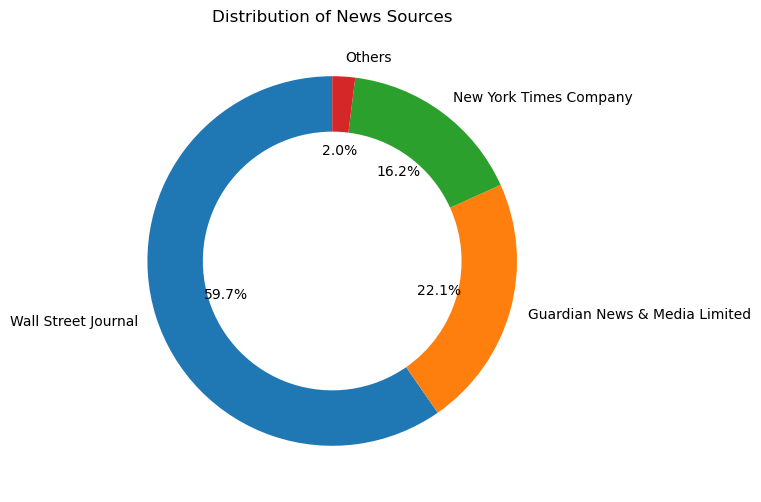

In [89]:
import matplotlib.pyplot as plt

# Calculate the proportions of each value in the 'source' column
proportions = info['source'].value_counts(normalize=True)

# Set a threshold for smaller portions, e.g., 0.05 for 5%
threshold = 0.05
mask = proportions > threshold
tail = proportions.loc[~mask]

# If there are any values below the threshold, group them into 'Others'
if tail.sum() > 0:
    proportions = proportions.loc[mask]
    proportions['Others'] = tail.sum()

# Plot the pie chart
plt.figure(figsize=(8, 6))
proportions.plot.pie(autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Distribution of News Sources')
plt.ylabel('')  # This is to remove the default 'source' ylabel
plt.show()



In [45]:
grouped_df = info.groupby(['date', 'source']).agg({
    'length': 'sum',
    'positive_word_count': 'sum',
    'negative_word_count': 'sum'
}).reset_index()


In [46]:
grouped_df.head()

,date,source,length,positive_word_count,negative_word_count
0,2020-01-23,Wall Street Journal,386,5,10
1,2020-01-27,Wall Street Journal,1599,23,32
2,2020-01-28,Wall Street Journal,1094,30,25
3,2020-01-29,Wall Street Journal,675,7,18
4,2020-01-31,Wall Street Journal,530,0,14


In [47]:
source_names = grouped_df['source'].unique()
print(source_names)

['Wall Street Journal' 'Guardian News & Media Limited'
 'New York Times Company' 'The Times (London)' 'New York Times Co mpany'
 'New Y ork Times Company' 'New York T imes Company'
 'Gua rdian News & Media Limited' 'New York Times Com pany'
 'New York Times Comp any' 'New York Times C ompany'
 'New Yor k Times Company' 'Guardian News & Media Limi ted'
 'New York Time s Company' 'Ne w York Times Company'
 'Guardian News & Media L imited' 'New Yo rk Times Company'
 'New York Times Compan y' 'Guardian News & Media Limit ed'
 'Guardian N ews & Media Limited' 'Guardian News & Me dia Limited'
 'Guardia n News & Media Limited' 'New York Ti mes Company'
 'Guardian News & Media Limite d' 'China Daily']


In [48]:
stats = grouped_df.groupby('source')[['length', 'positive_word_count', 'negative_word_count']].describe()
stats

length                                     \
                                count          mean          std     min   
source                                                                     
China Daily                      78.0    530.038462   330.220565   207.0   
Gua rdian News & Media Limited    2.0   1109.500000   703.571247   612.0   
Guardia n News & Media Limited    1.0    910.000000          NaN   910.0   
Guardian N ews & Media Limited    1.0    547.000000          NaN   547.0   
Guardian News & Me dia Limited    1.0    740.000000          NaN   740.0   
Guardian News & Media L imited    1.0   3600.000000          NaN  3600.0   
Guardian News & Media Limi ted    1.0    885.000000          NaN   885.0   
Guardian News & Media Limit ed    1.0    538.000000          NaN   538.0   
Guardian News & Media Limite d    1.0    984.000000          NaN   984.0   
Guardian News & Media Limited   316.0   7273.617089  4021.827266   458.0   
Ne w York Times Company           2.0   1929.000000   287.085353  1726.0   
New Y ork Times Company           1.0   1368.000000          NaN  1368.0   
New Yo rk Times Company           2.0   1580.000000   319.612265  1354.0   
New Yor k Times Company           2.0   1612.000000    35.355339  1587.0   
New York T imes Company           1.0   1449.000000          NaN  1449.0   
New York Ti mes Company           1.0   1129.000000          NaN  1129.0   
New York Time s Company           1.0   1315.000000          NaN  1315.0   
New York Times C ompany           2.0   1486.000000   147.078210  1382.0   
New York Times Co mpany           2.0   1676.000000    14.142136  1666.0   
New York Times Com pany           1.0   1475.000000          NaN  1475.0   
New York Times Comp any           2.0   1380.000000    59.396970  1338.0   
New York Times Compan y           1.0    897.000000          NaN   897.0   
New York Times Company          213.0  12681.521127  6160.802697   858.0   
The Times (London)               51.0    810.705882   493.998028   205.0   
Wall Street Journal             280.0  16901.450000  8914.041069   167.0   

                                                                      \
                                     25%      50%       75%      max   
source                                                                 
China Daily                       292.25    451.5    644.50   1720.0   
Gua rdian News & Media Limited    860.75   1109.5   1358.25   1607.0   
Guardia n News & Media Limited    910.00    910.0    910.00    910.0   
Guardian N ews & Media Limited    547.00    547.0    547.00    547.0   
Guardian News & Me dia Limited    740.00    740.0    740.00    740.0   
Guardian News & Media L imited   3600.00   3600.0   3600.00   3600.0   
Guardian News & Media Limi ted    885.00    885.0    885.00    885.0   
Guardian News & Media Limit ed    538.00    538.0    538.00    538.0   
Guardian News & Media Limite d    984.00    984.0    984.00    984.0   
Guardian News & Media Limited    4269.75   7068.5   9570.00  20982.0   
Ne w York Times Company          1827.50   1929.0   2030.50   2132.0   
New Y ork Times Company          1368.00   1368.0   1368.00   1368.0   
New Yo rk Times Company          1467.00   1580.0   1693.00   1806.0   
New Yor k Times Company          1599.50   1612.0   1624.50   1637.0   
New York T imes Company          1449.00   1449.0   1449.00   1449.0   
New York Ti mes Company          1129.00   1129.0   1129.00   1129.0   
New York Time s Company          1315.00   1315.0   1315.00   1315.0   
New York Times C ompany          1434.00   1486.0   1538.00   1590.0   
New York Times Co mpany          1671.00   1676.0   1681.00   1686.0   
New York Times Com pany          1475.00   1475.0   1475.00   1475.0   
New York Times Comp any          1359.00   1380.0   1401.00   1422.0   
New York Times Compan y           897.00    897.0    897.00    897.0   
New York Times Company           7637.00  11883.0  17340.00  27382.0   
The Times (London)            

In [49]:
source_length_totals = grouped_df.groupby('source')['length'].sum()
print(source_length_totals)


source
China Daily                         41343
Gua rdian News & Media Limited       2219
Guardia n News & Media Limited        910
Guardian N ews & Media Limited        547
Guardian News & Me dia Limited        740
Guardian News & Media L imited       3600
Guardian News & Media Limi ted        885
Guardian News & Media Limit ed        538
Guardian News & Media Limite d        984
Guardian News & Media Limited     2298463
Ne w York Times Company              3858
New Y ork Times Company              1368
New Yo rk Times Company              3160
New Yor k Times Company              3224
New York T imes Company              1449
New York Ti mes Company              1129
New York Time s Company              1315
New York Times C ompany              2972
New York Times Co mpany              3352
New York Times Com pany              1475
New York Times Comp any              2760
New York Times Compan y               897
New York Times Company            2701164
The Times (London)         

In [50]:
source_positive_totals = grouped_df.groupby('source')['positive_word_count'].sum()
print(source_positive_totals)

source
China Daily                         957
Gua rdian News & Media Limited       34
Guardia n News & Media Limited       21
Guardian N ews & Media Limited        7
Guardian News & Me dia Limited       16
Guardian News & Media L imited       51
Guardian News & Media Limi ted       11
Guardian News & Media Limit ed        2
Guardian News & Media Limite d       14
Guardian News & Media Limited     40768
Ne w York Times Company              52
New Y ork Times Company              18
New Yo rk Times Company              55
New Yor k Times Company              64
New York T imes Company              31
New York Ti mes Company              17
New York Time s Company              24
New York Times C ompany              39
New York Times Co mpany              52
New York Times Com pany              26
New York Times Comp any              50
New York Times Compan y               6
New York Times Company            44326
The Times (London)                  813
Wall Street Journal              

In [51]:
source_negative_totals = grouped_df.groupby('source')['negative_word_count'].sum()
print(source_negative_totals)

source
China Daily                         693
Gua rdian News & Media Limited       29
Guardia n News & Media Limited        8
Guardian N ews & Media Limited        8
Guardian News & Me dia Limited        4
Guardian News & Media L imited       26
Guardian News & Media Limi ted       13
Guardian News & Media Limit ed        3
Guardian News & Media Limite d       10
Guardian News & Media Limited     28721
Ne w York Times Company              62
New Y ork Times Company              20
New Yo rk Times Company              42
New Yor k Times Company              33
New York T imes Company              21
New York Ti mes Company              48
New York Time s Company              22
New York Times C ompany              56
New York Times Co mpany              41
New York Times Com pany              13
New York Times Comp any              36
New York Times Compan y               5
New York Times Company            34531
The Times (London)                  571
Wall Street Journal              

In [52]:
specific_source_stats = grouped_df[grouped_df['source'] == 'Wall Street Journal'].describe()
print(specific_source_stats)

             length  positive_word_count  negative_word_count
count    280.000000           280.000000           280.000000
mean   16901.450000           261.885714           188.014286
std     8914.041069           136.116100           109.067897
min      167.000000             0.000000             3.000000
25%    11313.000000           180.750000           113.000000
50%    16255.000000           255.500000           165.000000
75%    22859.500000           350.500000           249.250000
max    45271.000000           693.000000           557.000000


In [53]:
grouped_df[grouped_df['source'] == 'Wall Street Journal'].skew()

C:\Users\20315\AppData\Local\Temp\ipykernel_16864\470179212.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  grouped_df[grouped_df['source'] == 'Wall Street Journal'].skew()


length                 0.277026
positive_word_count    0.251057
negative_word_count    0.742766
dtype: float64

In [54]:
grouped_df[grouped_df['source'] == 'Wall Street Journal'].kurt()

C:\Users\20315\AppData\Local\Temp\ipykernel_16864\1402241044.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  grouped_df[grouped_df['source'] == 'Wall Street Journal'].kurt()


length                -0.182194
positive_word_count    0.074514
negative_word_count    0.176182
dtype: float64

In [55]:
specific_source_stats = grouped_df[grouped_df['source'] == 'Guardian News & Media Limited'].describe()
print(specific_source_stats)

             length  positive_word_count  negative_word_count
count    316.000000           316.000000           316.000000
mean    7273.617089           129.012658            90.889241
std     4021.827266            74.058320            53.613346
min      458.000000             8.000000             3.000000
25%     4269.750000            72.750000            50.750000
50%     7068.500000           119.000000            84.000000
75%     9570.000000           172.250000           120.000000
max    20982.000000           360.000000           272.000000


In [56]:
grouped_df[grouped_df['source'] == 'Guardian News & Media Limited'].skew()

C:\Users\20315\AppData\Local\Temp\ipykernel_16864\2342106329.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  grouped_df[grouped_df['source'] == 'Guardian News & Media Limited'].skew()


length                 0.586741
positive_word_count    0.632521
negative_word_count    0.819769
dtype: float64

In [57]:
grouped_df[grouped_df['source'] == 'Guardian News & Media Limited'].kurt()

C:\Users\20315\AppData\Local\Temp\ipykernel_16864\1057812977.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  grouped_df[grouped_df['source'] == 'Guardian News & Media Limited'].kurt()


length                 0.058943
positive_word_count   -0.094361
negative_word_count    0.609049
dtype: float64

In [58]:
specific_source_stats = grouped_df[grouped_df['source'] == 'New York Times Company'].describe()
print(specific_source_stats)

             length  positive_word_count  negative_word_count
count    213.000000           213.000000           213.000000
mean   12681.521127           208.103286           162.117371
std     6160.802697           102.026257            87.236992
min      858.000000             6.000000             6.000000
25%     7637.000000           136.000000            97.000000
50%    11883.000000           189.000000           143.000000
75%    17340.000000           282.000000           232.000000
max    27382.000000           486.000000           377.000000


In [59]:
grouped_df[grouped_df['source'] == 'New York Times Company'].skew()

C:\Users\20315\AppData\Local\Temp\ipykernel_16864\233428282.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  grouped_df[grouped_df['source'] == 'New York Times Company'].skew()


length                 0.197174
positive_word_count    0.268287
negative_word_count    0.470130
dtype: float64

In [60]:
grouped_df[grouped_df['source'] == 'New York Times Company'].kurt()

C:\Users\20315\AppData\Local\Temp\ipykernel_16864\2589604559.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  grouped_df[grouped_df['source'] == 'New York Times Company'].kurt()


length                -0.853518
positive_word_count   -0.594398
negative_word_count   -0.658466
dtype: float64

In [92]:
nyse_filtered['Date'] = pd.to_datetime(nyse_filtered['Date'])
nyse_filtered = nyse_filtered.rename(columns={'Date':'date'})
merged_df = grouped_df.merge(nyse_filtered, on='date', how='inner')

KeyError: 'Date'

In [93]:
merged_df.head()

,date,source,length,positive_word_count,negative_word_count,Open,High,Low,Close,Adj Close,Volume,Daily_return,Trend,Trend_duration
0,2020-01-23,Wall Street Journal,386,5,10,14064.280273,14109.589844,14003.280273,14102.040039,14102.040039,3766710000,-0.000581,DOWN,1
1,2020-01-27,Wall Street Journal,1599,23,32,13746.629883,13826.429688,13742.009766,13769.599609,13769.599609,3831050000,-0.014942,DOWN,3
2,2020-01-28,Wall Street Journal,1094,30,25,13812.650391,13913.589844,13798.339844,13877.610352,13877.610352,3531570000,0.007844,UP,1
3,2020-01-29,Wall Street Journal,675,7,18,13912.790039,13922.440430,13843.790039,13843.809570,13843.809570,3600250000,-0.002436,DOWN,1
4,2020-01-31,Wall Street Journal,530,0,14,13783.809570,13788.219727,13573.040039,13614.099609,13614.099609,4529700000,-0.017878,DOWN,1


In [94]:
merged_df['negative_score'] = merged_df['negative_word_count']/merged_df['length']
merged_df.head()

,date,source,length,positive_word_count,negative_word_count,Open,High,Low,Close,Adj Close,Volume,Daily_return,Trend,Trend_duration,negative_score
0,2020-01-23,Wall Street Journal,386,5,10,14064.280273,14109.589844,14003.280273,14102.040039,14102.040039,3766710000,-0.000581,DOWN,1,0.025907
1,2020-01-27,Wall Street Journal,1599,23,32,13746.629883,13826.429688,13742.009766,13769.599609,13769.599609,3831050000,-0.014942,DOWN,3,0.020013
2,2020-01-28,Wall Street Journal,1094,30,25,13812.650391,13913.589844,13798.339844,13877.610352,13877.610352,3531570000,0.007844,UP,1,0.022852
3,2020-01-29,Wall Street Journal,675,7,18,13912.790039,13922.440430,13843.790039,13843.809570,13843.809570,3600250000,-0.002436,DOWN,1,0.026667
4,2020-01-31,Wall Street Journal,530,0,14,13783.809570,13788.219727,13573.040039,13614.099609,13614.099609,4529700000,-0.017878,DOWN,1,0.026415


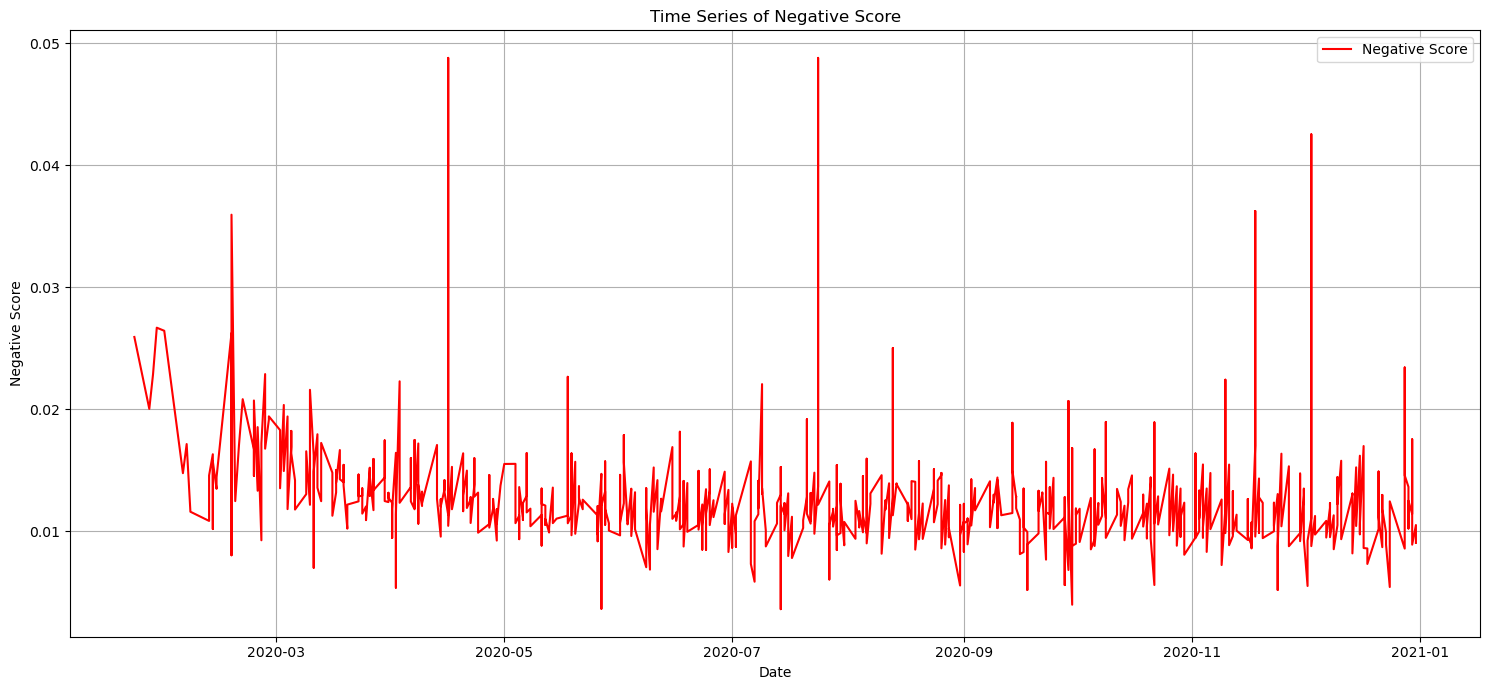

In [95]:
plt.figure(figsize=(15, 7))
plt.plot(merged_df['date'], merged_df['negative_score'], label='Negative Score', color='red')
plt.title('Time Series of Negative Score')
plt.xlabel('Date')
plt.ylabel('Negative Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [96]:
merged_df['negative_score'].describe()

count    666.000000
mean       0.012500
std        0.004093
min        0.003597
25%        0.010296
50%        0.012000
75%        0.013814
max        0.048780
Name: negative_score, dtype: float64

In [97]:
skewness = merged_df['negative_score'].skew()
kurtosis = merged_df['negative_score'].kurt()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 3.661473890697063
Kurtosis: 25.46812663760082


## IMG corpus

In [61]:
al = pd.read_csv('raw_data/IMG_corpus/all_reports.csv')
al.head()

,date,title,section,body,subject,length,source
0,2022-01-25,COVID-19: A Second Opinion,NaN,While social media operates on the attention l...,DISINFORMATION & MISINFORMATION (93%); EPIDEMI...,406.0,iOTWreport
1,2022-12-16,Celebrities Are Boosting Disinformation About ...,NaN,The following information was released by the ...,FINES & PENALTIES (93%); COVID CORONAVIRUS (91...,225.0,Eurasia Review
2,2022-03-29,OP HILLMAN - COVID-19 REGULATION BREACHES UPDATE,NaN,"COVID-19 isn't really over, I know. Every day,...",COVID CORONAVIRUS (96%); COVID-19 CORONAVIRUS ...,552.0,States News Service
3,2022-12-19,"COVID-19 Pandemic Over? Opinions, Please",NaN,The following is a lightly edited transcript o...,COVID CORONAVIRUS (91%); COVID-19 CORONAVIRUS ...,244.0,Chiang Rai Times
4,2022-05-09,Show Empathy for Those Vulnerable to COVID-19 ...,NaN,The city government reduced the operating time...,COVID CORONAVIRUS (93%); COVID-19 CORONAVIRUS ...,298.0,Newsweek.com


In [62]:
al.drop(['title', 'section', 'subject'], axis=1, inplace=True)
al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    300 non-null    object 
 1   body    299 non-null    object 
 2   length  299 non-null    float64
 3   source  300 non-null    object 
dtypes: float64(1), object(3)
memory usage: 9.5+ KB


In [63]:
al['date'] = pd.to_datetime(al['date'])
al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    300 non-null    datetime64[ns]
 1   body    299 non-null    object        
 2   length  299 non-null    float64       
 3   source  300 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 9.5+ KB


In [64]:
al.dropna(subset=['body','length'], inplace=True)
al['length'] = al['length'].astype(int)
al.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    299 non-null    datetime64[ns]
 1   body    299 non-null    object        
 2   length  299 non-null    int32         
 3   source  299 non-null    object        
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 10.5+ KB


In [65]:
cdimg = pd.read_csv('raw_data/IMG_corpus/CD.csv')
cdimg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     98 non-null     object
 1   title    98 non-null     object
 2   source   98 non-null     object
 3   length   98 non-null     int64 
 4   body     98 non-null     object
 5   subject  85 non-null     object
dtypes: int64(1), object(5)
memory usage: 4.7+ KB


In [66]:
cdimg.drop(['title','subject'], axis=1, inplace=True)
cdimg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   source  98 non-null     object
 2   length  98 non-null     int64 
 3   body    98 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


In [67]:
cdimg = cdimg[['date','body','length','source']]
cdimg.head()

,date,body,length,source
0,2021-12-26,chinadaily.com.cn | Updated: 2021-03-08 19:59\...,454,China Daily
1,2021-03-08,"By XIE CHUANJIAO in Qingdao, Shandong | CHINA ...",504,China Daily
2,2021-09-03,chinadaily.com.cn | Updated: 2021-12-12 19:28\...,502,China Daily
3,2021-12-12,By Zhang Zhihao | chinadaily.com.cn | Updated:...,529,China Daily
4,2020-04-09,By WANG XU | China Daily Global | Updated: 202...,436,China Daily


In [68]:
cdimg['date'] = pd.to_datetime(cdimg['date'])
cdimg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   body    98 non-null     object        
 2   length  98 non-null     int64         
 3   source  98 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.2+ KB


In [69]:
ed = pd.read_csv('raw_data/IMG_corpus/full_editorial.csv', encoding='latin-1')
ed.head()

,body,date,length,source
0,I note that Keir Starmer has opened his accoun...,6-Apr-20,270,Scotsman Publications
1,As Covid19 makes social distancing a matter of...,6-Apr-20,963,New York Times Company
2,Britons will need to stay at home for weeks to...,6-Apr-20,646,Guardian News & Media Limited
3,Labourâs new leader exudes competence and id...,6-Apr-20,613,Guardian News & Media Limited
4,WHEN are news and magazinestyle programmes goi...,6-Apr-20,102,Independent News & Media


In [70]:
ed = ed[['date','body','length','source']]
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3535 non-null   object
 1   body    3243 non-null   object
 2   length  3552 non-null   int64 
 3   source  3527 non-null   object
dtypes: int64(1), object(3)
memory usage: 111.1+ KB


In [71]:
ed.dropna(subset=['body','date','length','source'], inplace=True)
ed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3231 entries, 0 to 3550
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3231 non-null   object
 1   body    3231 non-null   object
 2   length  3231 non-null   int64 
 3   source  3231 non-null   object
dtypes: int64(1), object(3)
memory usage: 126.2+ KB


In [72]:
ed1 = ed
from dateutil.parser import parse

def is_date(string):
    try: 
        parse(string)
        return True
    except ValueError:
        return False

# Convert all dates to strings before trying to parse them
ed1['date'] = ed1['date'].astype(str)

# Create a boolean mask for the rows with good dates
mask = ed1['date'].apply(is_date)

# Keep only the rows with good dates (and drop the rows with bad dates)
ed1 = ed1[mask]
ed1

,date,body,length,source
0,6-Apr-20,I note that Keir Starmer has opened his accoun...,270,Scotsman Publications
1,6-Apr-20,As Covid19 makes social distancing a matter of...,963,New York Times Company
2,6-Apr-20,Britons will need to stay at home for weeks to...,646,Guardian News & Media Limited
3,6-Apr-20,Labourâs new leader exudes competence and id...,613,Guardian News & Media Limited
4,6-Apr-20,WHEN are news and magazinestyle programmes goi...,102,Independent News & Media
...,...,...,...,...
3546,27-Dec-20,Thereâs no sign that ministers will use the ...,1065,Guardian News & Media Limited
3547,27-Dec-20,On this last Sunday of 2020 we reflect on what...,831,SyndiGate Media Inc
3548,27-Dec-20,sir I thought your Leading Article December 2...,165,Daily Telegraph
3549,27-Dec-20,sir I have been following the discussion abou...,355,Daily Telegraph


In [73]:
# Create a function to handle multiple date formats
def parse_dates(date):
    for fmt in ('%b%d,%Y', '%d-%b-%y'):
        try:
            return pd.datetime.strptime(date, fmt)
        except ValueError:
            continue
    return np.nan

# Apply the function to the date column
ed1['date'] = ed1['date'].apply(parse_dates)


ed1.head()

C:\Users\20315\AppData\Local\Temp\ipykernel_16864\3448375375.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime(date, fmt)
C:\Users\20315\AppData\Local\Temp\ipykernel_16864\3448375375.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed1['date'] = ed1['date'].apply(parse_dates)


,date,body,length,source
0,2020-04-06,I note that Keir Starmer has opened his accoun...,270,Scotsman Publications
1,2020-04-06,As Covid19 makes social distancing a matter of...,963,New York Times Company
2,2020-04-06,Britons will need to stay at home for weeks to...,646,Guardian News & Media Limited
3,2020-04-06,Labourâs new leader exudes competence and id...,613,Guardian News & Media Limited
4,2020-04-06,WHEN are news and magazinestyle programmes goi...,102,Independent News & Media


In [74]:
ed1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3188 entries, 0 to 3550
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3184 non-null   datetime64[ns]
 1   body    3188 non-null   object        
 2   length  3188 non-null   int64         
 3   source  3188 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 124.5+ KB


In [75]:
img = pd.concat([ed1, al, cdimg])
img.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 97
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3581 non-null   datetime64[ns]
 1   body    3585 non-null   object        
 2   length  3585 non-null   int64         
 3   source  3585 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 140.0+ KB


In [76]:
# Sort the DataFrame by date in ascending order
img = img.sort_values(by='date')
img = img.reset_index(drop=True)
# Check the result
img.head()

,date,body,length,source
0,2020-02-04,The novel coronavirus has killed at least 425 ...,281,Dow Jones & Company Inc.
1,2020-02-05,The novel coronavirus has killed at least 425 ...,297,Dow Jones & Company Inc.
2,2020-02-18,In just over a month the coronavirus outbreak ...,470,The Irish Times DAC
3,2020-02-25,The World Health Organization WHO still hasnt ...,804,Dow Jones & Company Inc.
4,2020-02-25,The World Health Organization WHO still hasnt ...,747,Dow Jones & Company Inc.


In [77]:
img['positive_word_count'] = img['body'].apply(count_positive_words)
# Add a new column 'negative_word_count' to the DataFrame
img['negative_word_count'] = img['body'].apply(count_negative_words)
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 3581 non-null   datetime64[ns]
 1   body                 3585 non-null   object        
 2   length               3585 non-null   int64         
 3   source               3585 non-null   object        
 4   positive_word_count  3585 non-null   int64         
 5   negative_word_count  3585 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 168.2+ KB


In [78]:
img.drop('body', axis=1, inplace=True)
img.head()

,date,length,source,positive_word_count,negative_word_count
0,2020-02-04,281,Dow Jones & Company Inc.,12,11
1,2020-02-05,297,Dow Jones & Company Inc.,13,11
2,2020-02-18,470,The Irish Times DAC,8,18
3,2020-02-25,804,Dow Jones & Company Inc.,8,12
4,2020-02-25,747,Dow Jones & Company Inc.,8,11


In [79]:
pd.set_option('display.max_rows', None)

source_counts = img.groupby('source').size().sort_values()
print(source_counts)

source
ABC Premium News (Australia)                                                                                                                           1
Japan Economic Newswire                                                                                                                                1
M2 Pharma                                                                                                                                              1
MENAFN - Business & Finance News (English)                                                                                                             1
Manly Daily (Australia)                                                                                                                                1
Medical Xpress                                                                                                                                         1
NLA M edia                                                                 

In [80]:
sum_of_counts_less_than_100 = source_counts[source_counts < 98].sum()
print(sum_of_counts_less_than_100)


540


In [103]:
grouped_img = img.groupby(['date']).agg({
    'length': 'sum',
    'positive_word_count': 'sum',
    'negative_word_count': 'sum'
}).reset_index()
grouped_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 469 non-null    datetime64[ns]
 1   length               469 non-null    int64         
 2   positive_word_count  469 non-null    int64         
 3   negative_word_count  469 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 14.8 KB


In [104]:
start_date = '2020-01-01'
end_date = '2020-12-31'
grouped_img = grouped_img[(grouped_img['date'] >= start_date) & (grouped_img['date'] <= end_date)]
grouped_img.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 311
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 312 non-null    datetime64[ns]
 1   length               312 non-null    int64         
 2   positive_word_count  312 non-null    int64         
 3   negative_word_count  312 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 12.2 KB


In [82]:
source_length_totals = grouped_img.groupby('source')['length'].sum().sort_values()
print(source_length_totals)

source
Chiang Rai Times                                                                                                                                        244
Independ ent News & Media                                                                                                                               281
NLA M edia                                                                                                                                              283
Times Now                                                                                                                                               303
Mena Report                                                                                                                                             409
Manly Daily (Australia)                                                                                                                                 417
Singapore Government News                                

In [83]:
grouped_img['length'].sum()

1950131

In [84]:
source_positive_totals = grouped_img.groupby('source')['positive_word_count'].sum().sort_values()
print(source_positive_totals)

source
The Finan cial Times Limited                                                                                                                             5
The Financial Times Li mited                                                                                                                             5
NLA M edia                                                                                                                                               5
Peninsula Clarion (Kenai, Alaska)                                                                                                                        6
Scotsman Publicatio ns                                                                                                                                   6
Mena Report                                                                                                                                              7
The Week UK                                                    

In [85]:
grouped_img['positive_word_count'].sum()

42815

In [86]:
source_negative_totals = grouped_img.groupby('source')['negative_word_count'].sum().sort_values()
print(source_negative_totals)

source
Times Now                                                                                                                                                0
Chiang Rai Times                                                                                                                                         0
M2 Pharma                                                                                                                                                2
Dow Jones & Company In c.                                                                                                                                2
Pennsylvania Capital-Star                                                                                                                                2
The Canadian Press                                                                                                                                       2
Singapore Government News                                      

In [87]:
grouped_img['negative_word_count'].sum()

34178

In [88]:
specific_source_stats = grouped_img[grouped_img['source'] == 'Guardian News & Media Limited'].describe()
print(specific_source_stats)

            length  positive_word_count  negative_word_count
count   192.000000           192.000000           192.000000
mean   1020.630208            23.218750            21.265625
std     520.981960            14.404917            13.152639
min     401.000000             3.000000             2.000000
25%     630.000000            13.000000            11.000000
50%     745.500000            19.000000            18.000000
75%    1224.000000            29.250000            28.000000
max    2893.000000           103.000000            76.000000


In [105]:
merged_img = grouped_img.merge(nyse_filtered, on='date', how='inner')
merged_img['negative_score'] = merged_img['negative_word_count']/merged_img['length']
merged_img.tail()

,date,length,positive_word_count,negative_word_count,Open,High,Low,Close,Adj Close,Volume,Daily_return,Trend,Trend_duration,negative_score
213,2020-12-24,6474,220,89,14398.620117,14398.620117,14324.769531,14382.500000,14382.500000,1883780000,-0.001120,DOWN,1,0.013747
214,2020-12-28,2561,47,32,14476.349609,14481.480469,14396.230469,14405.769531,14405.769531,3535460000,0.001618,UP,1,0.012495
215,2020-12-29,4045,55,86,14500.030273,14515.809570,14371.870117,14397.919922,14397.919922,3393290000,-0.000545,DOWN,1,0.021261
216,2020-12-30,3188,63,44,14447.959961,14520.570313,14447.959961,14477.480469,14477.480469,3154850000,0.005526,UP,1,0.013802
217,2020-12-31,4077,60,56,14469.000000,14533.209961,14422.740234,14524.799805,14524.799805,3179040000,0.003268,UP,2,0.013736


In [106]:
merged_img.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 217
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 218 non-null    datetime64[ns]
 1   length               218 non-null    int64         
 2   positive_word_count  218 non-null    int64         
 3   negative_word_count  218 non-null    int64         
 4   Open                 218 non-null    float64       
 5   High                 218 non-null    float64       
 6   Low                  218 non-null    float64       
 7   Close                218 non-null    float64       
 8   Adj Close            218 non-null    float64       
 9   Volume               218 non-null    int64         
 10  Daily_return         218 non-null    float64       
 11  Trend                218 non-null    object        
 12  Trend_duration       218 non-null    int64         
 13  negative_score       218 non-null  

In [107]:
merged_img['negative_score'].describe()

count    218.000000
mean       0.017100
std        0.004511
min        0.008681
25%        0.014124
50%        0.016652
75%        0.019244
max        0.039146
Name: negative_score, dtype: float64

In [108]:
skewness = merged_img['negative_score'].skew()
kurtosis = merged_img['negative_score'].kurt()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 1.565710130507721
Kurtosis: 5.384603873841315


## Full Corpus

In [119]:
full = pd.concat([grouped_df, grouped_img])
grouped_full = full.groupby(['date']).agg({
    'length': 'sum',
    'positive_word_count': 'sum',
    'negative_word_count': 'sum'
}).reset_index()
grouped_full.head()

,date,length,positive_word_count,negative_word_count
0,2020-01-23,386,5,10
1,2020-01-27,1599,23,32
2,2020-01-28,1094,30,25
3,2020-01-29,675,7,18
4,2020-01-31,530,0,14


In [120]:
grouped_full.tail()

,date,length,positive_word_count,negative_word_count
427,2022-12-15,464,8,4
428,2022-12-26,889,17,12
429,2022-12-27,325,5,9
430,2022-12-29,834,41,16
431,2022-12-30,439,15,4


In [121]:
duplicate = grouped_full['date'].duplicated().any()
duplicate

False

In [122]:
merged_full = grouped_full.merge(nyse_filtered, on='date', how='inner')
merged_full['negative_score'] = merged_full['negative_word_count']/merged_full['length']
merged_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 234 non-null    datetime64[ns]
 1   length               234 non-null    int64         
 2   positive_word_count  234 non-null    int64         
 3   negative_word_count  234 non-null    int64         
 4   Open                 234 non-null    float64       
 5   High                 234 non-null    float64       
 6   Low                  234 non-null    float64       
 7   Close                234 non-null    float64       
 8   Adj Close            234 non-null    float64       
 9   Volume               234 non-null    int64         
 10  Daily_return         234 non-null    float64       
 11  Trend                234 non-null    object        
 12  Trend_duration       234 non-null    int64         
 13  negative_score       234 non-null  

In [123]:
merged_full['negative_score'].describe()

count    234.000000
mean       0.013259
std        0.003133
min        0.009567
25%        0.011565
50%        0.012647
75%        0.013872
max        0.039146
Name: negative_score, dtype: float64

In [124]:
skewness = merged_full['negative_score'].skew()
kurtosis = merged_full['negative_score'].kurt()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 3.7665987725963066
Kurtosis: 22.798647177060044


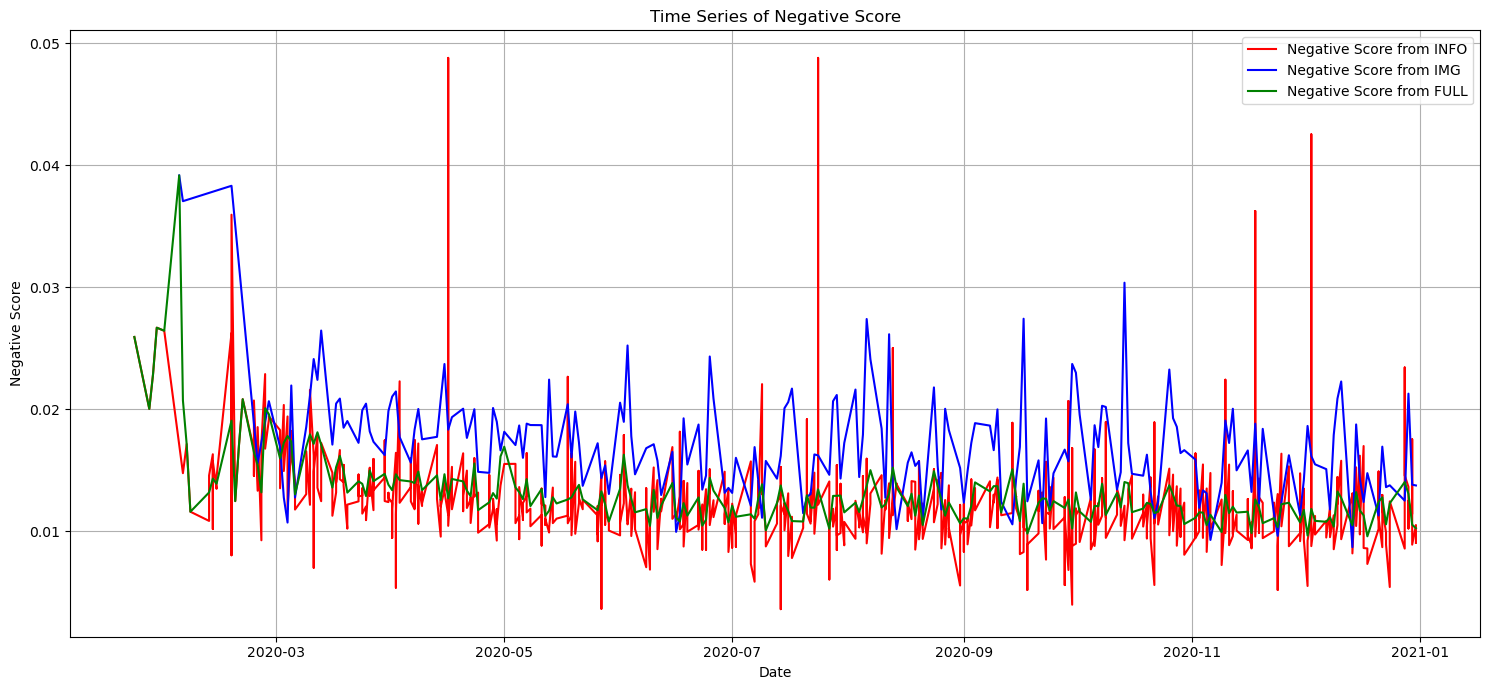

In [126]:
plt.figure(figsize=(15, 7))
df1 = merged_df
df2 = merged_img
df3 = merged_full
# Plot negative_score from each dataframe
plt.plot(df1['date'], df1['negative_score'], label='Negative Score from INFO', color='red')
plt.plot(df2['date'], df2['negative_score'], label='Negative Score from IMG', color='blue')
plt.plot(df3['date'], df3['negative_score'], label='Negative Score from FULL', color='green')

plt.title('Time Series of Negative Score')
plt.xlabel('Date')
plt.ylabel('Negative Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()